# Stock Prediction
---


This project's primary objective is to predict any given company's stock prices using historical stock data. By leveraging the capabilities of Long Short-Term Memory (LSTM) models, we aim to capture the underlying patterns and trends in the stock market data to make accurate future price predictions.

## Setting Up Environment

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import missingno as msno

import seaborn as sns

sns.set_style('darkgrid')
plt.style.use('seaborn-v0_8-bright')

#### Importing stock data and date handling Libraries

In [4]:
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr
from datetime import datetime

from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

#### Override yfinance's download function

In [5]:
yf.pdr_override()

yfinance: pandas_datareader support is deprecated & semi-broken so will be removed in a future verison. Just use yfinance.


#### Download Stock Data

Download Function

In [6]:
def download_stock_data(comp_stocks, start_date):
    stock_data = {}
    for stock in comp_stocks:
        stock_data[stock] = yf.download(stock, start=start_date, end=datetime.now())
    return stock_data

In [7]:
companies = ['TSLA', 'NFLX', 'TW', 'NVDA']

end_date = datetime.now()
start_date = datetime(end_date.year - 1, end_date.month, end_date.day)

stock_data = download_stock_data(companies, start_date)

company_names = ["TESLA", "NETFLIX", "TWITTER", "NVIDIA"]

for stock, name in zip(stock_data.values(), company_names):
    stock["company_name"] = name

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [8]:
all_stocks = pd.concat(stock_data.values(), axis=0)

## Descriptive Statistics Analysis

#### General Information

In [9]:
for stock in companies:
    print(f"General Info for {stock}:")
    print(stock_data[stock].info())
    print("\n")

General Info for TSLA:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2023-07-17 to 2024-07-15
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Adj Close     251 non-null    float64
 5   Volume        251 non-null    int64  
 6   company_name  251 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB
None


General Info for NFLX:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2023-07-17 to 2024-07-15
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    f

Checking for missings

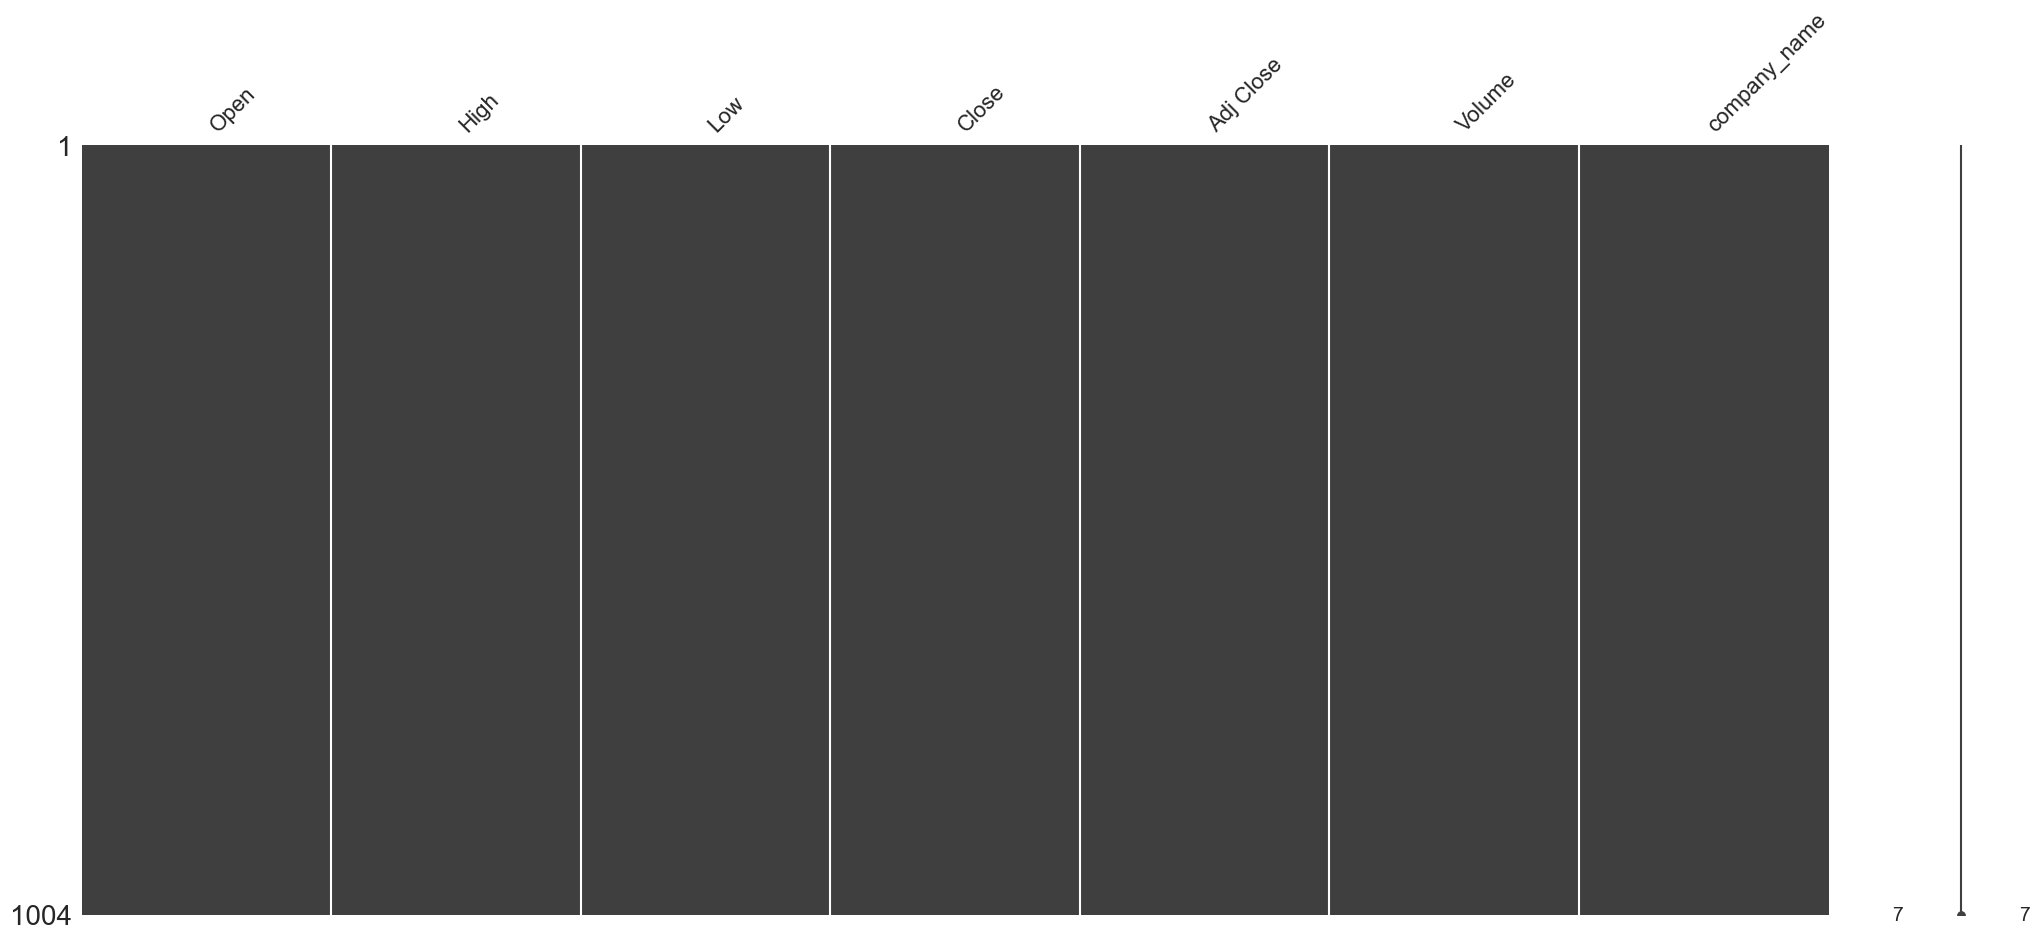

In [10]:
msno.matrix(all_stocks)
plt.show()

#### Summary statistics

In [11]:
for stock in companies:
    print(f"Summary Statistics for {stock}:")
    print(stock_data[stock].describe())
    print("\n")

Summary Statistics for TSLA:
             Open        High         Low       Close   Adj Close  \
count  251.000000  251.000000  251.000000  251.000000  251.000000   
mean   215.354084  219.576255  211.146175  215.406923  215.406923   
std     35.832616   36.418041   35.102342   35.805172   35.805172   
min    140.559998  144.440002  138.800003  142.050003  142.050003   
25%    181.900002  184.419998  176.959999  180.000000  180.000000   
50%    215.880005  220.100006  212.009995  215.550003  215.550003   
75%    247.580002  252.779999  242.540001  247.065002  247.065002   
max    296.040009  299.290009  289.519989  293.339996  293.339996   

             Volume  
count  2.510000e+02  
mean   1.085478e+08  
std    2.874710e+07  
min    5.086970e+07  
25%    8.903260e+07  
50%    1.070651e+08  
75%    1.230255e+08  
max    2.438697e+08  


Summary Statistics for NFLX:
             Open        High         Low       Close   Adj Close  \
count  251.000000  251.000000  251.000000  251.0000

#### Stock Analysis

Closing Price Analysis

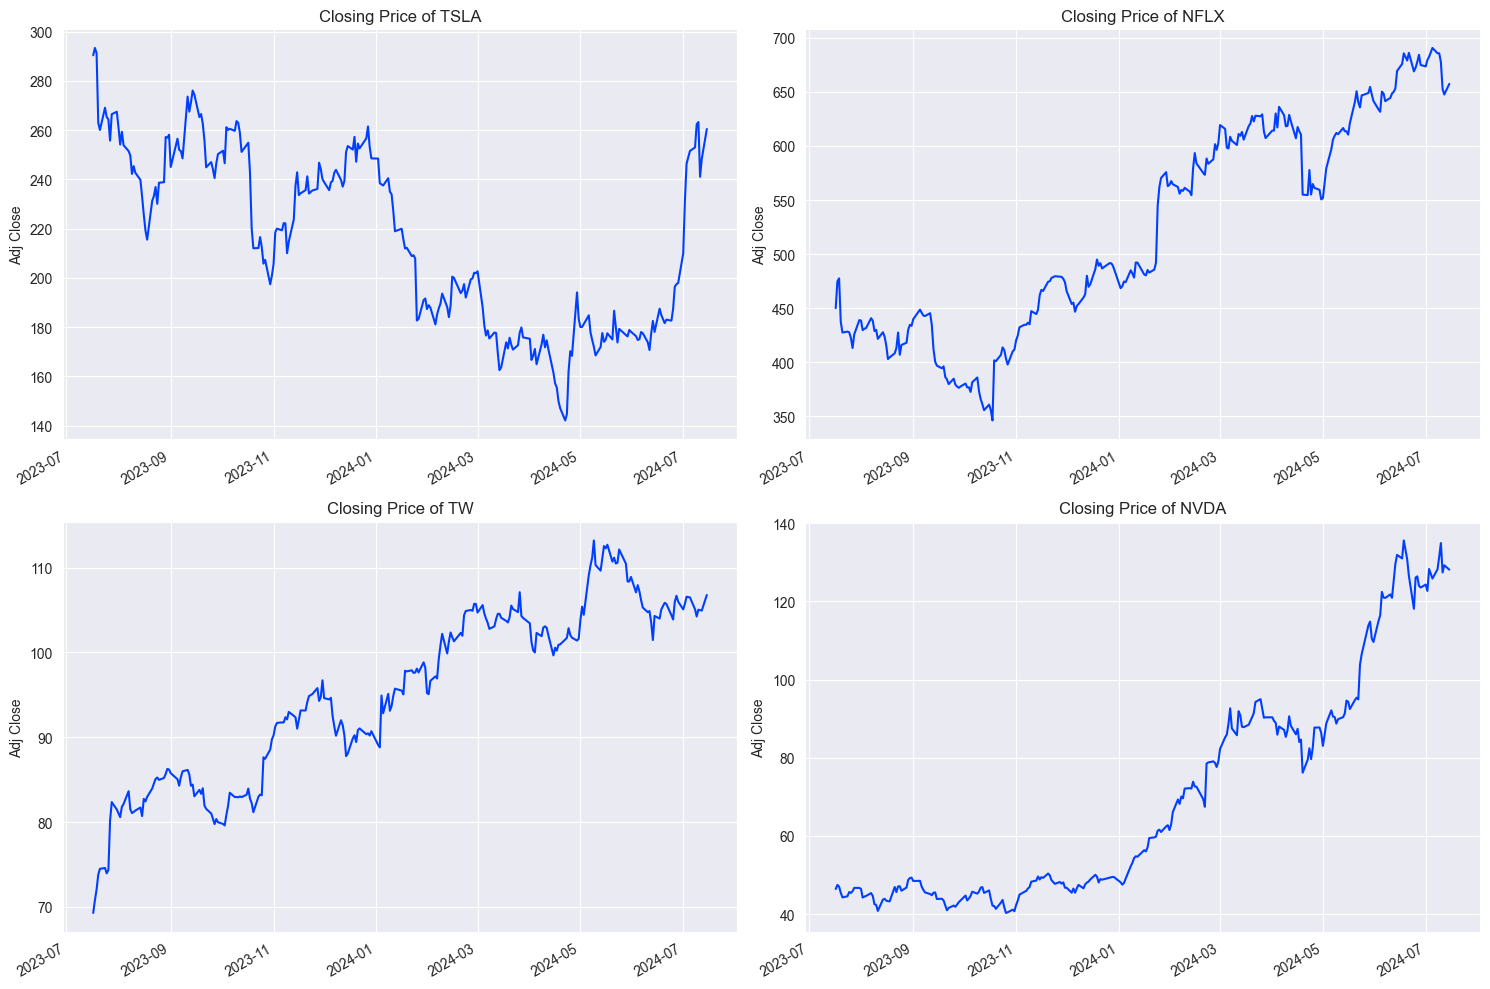

In [12]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, (ticker, data) in enumerate(stock_data.items(), 1):
    plt.subplot(2, 2, i)
    data['Adj Close'].plot(linewidth=1.5)
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {ticker}")

plt.tight_layout()
plt.show()

Volume of Sales Analysis

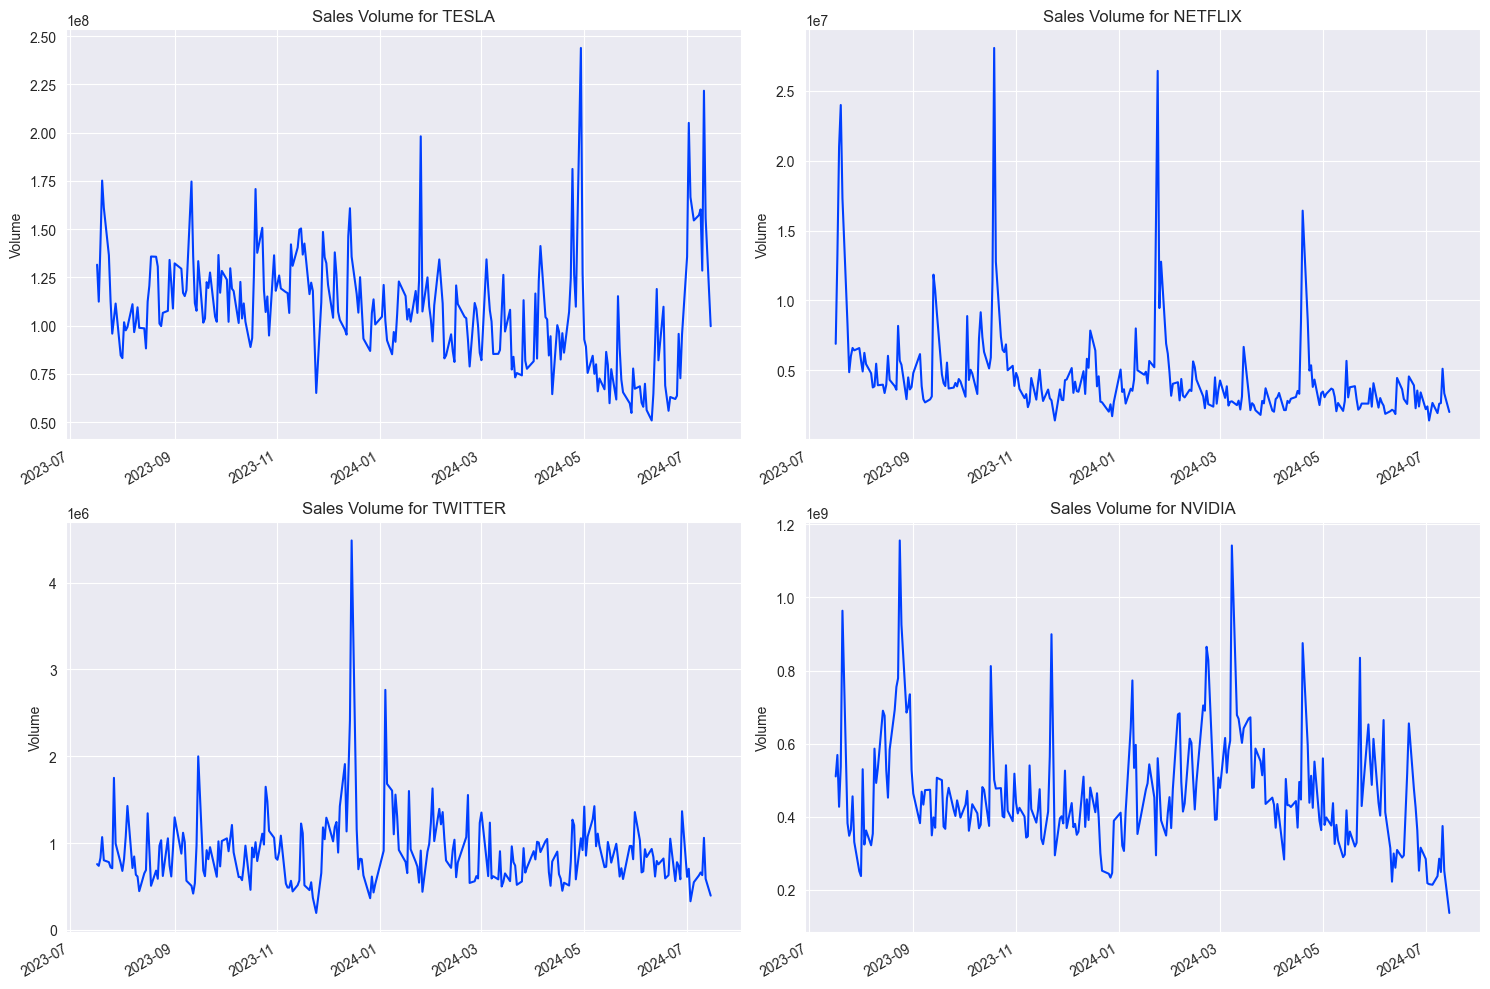

In [13]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, (stock, name) in enumerate(zip(companies, company_names), 1):
    plt.subplot(2, 2, i)
    stock_data[stock]['Volume'].plot(linewidth=1.5)
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {name}")
    
plt.tight_layout()
plt.show()

Moving Averages Analysis

C:\Users\PMYLS\AppData\Local\Temp\ipykernel_11472\3827438160.py:15: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


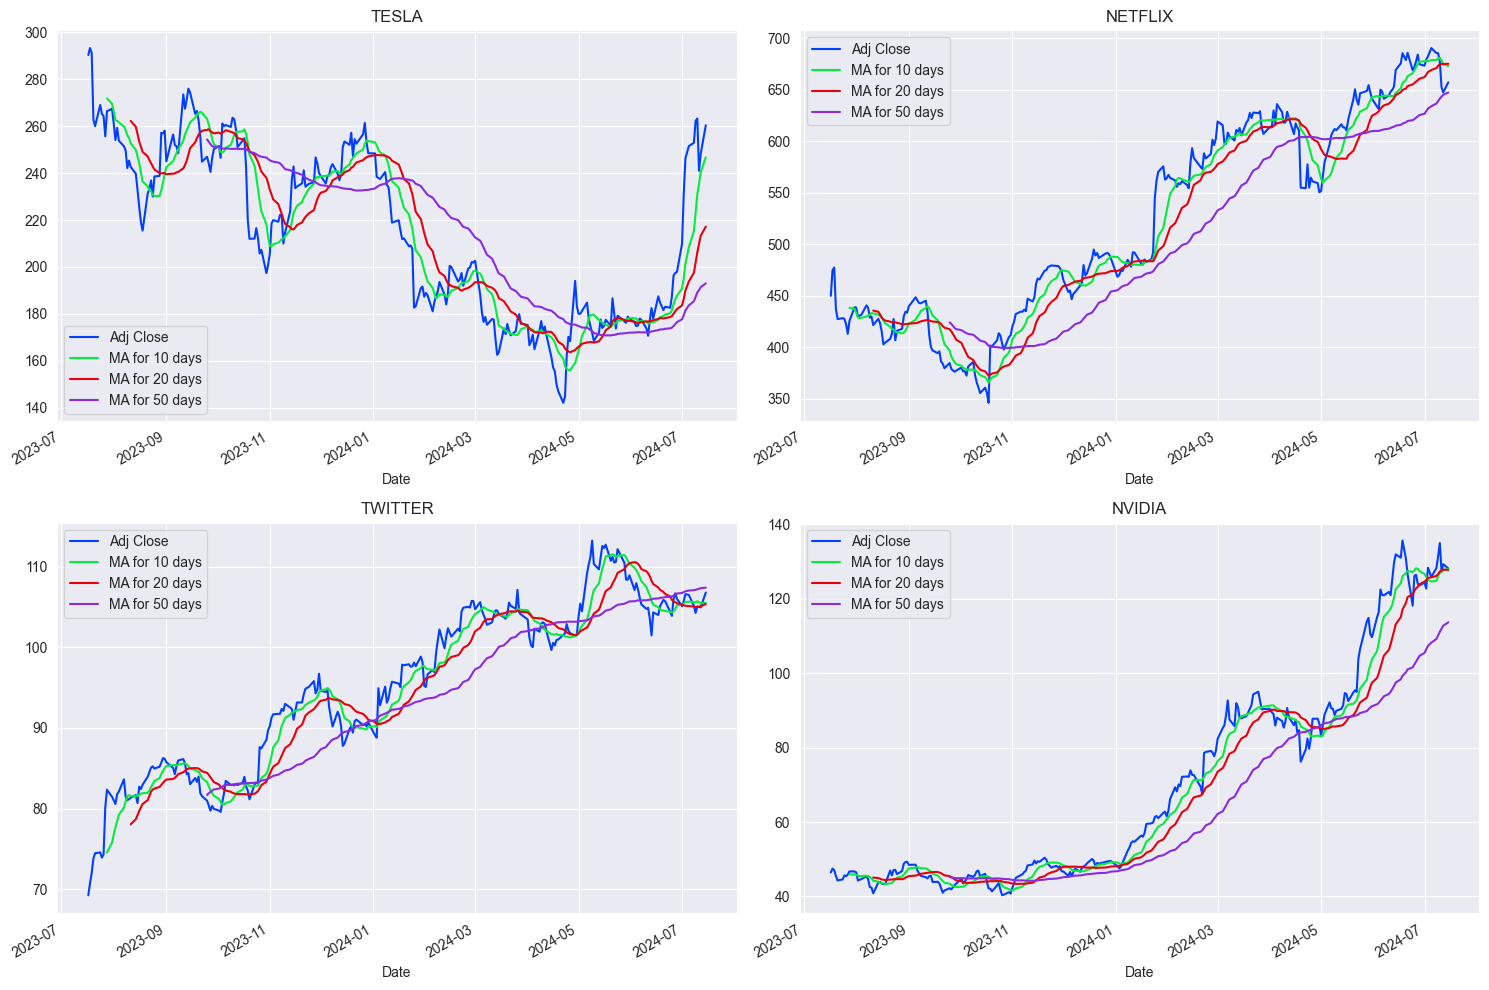

In [14]:
ma_days = [10, 20, 50]

for ma in ma_days:
    for stock in companies:
        column_name = f"MA for {ma} days"
        stock_data[stock][column_name] = stock_data[stock]['Adj Close'].rolling(ma).mean()

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

for ax, (stock, name) in zip(axes.flatten(), zip(companies, company_names)):
    stock_data[stock][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=ax, linewidth=1.5)
    ax.set_title(name)

fig.tight_layout()
fig.show()

Daily Returns Analysis

C:\Users\PMYLS\AppData\Local\Temp\ipykernel_11472\3533803635.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


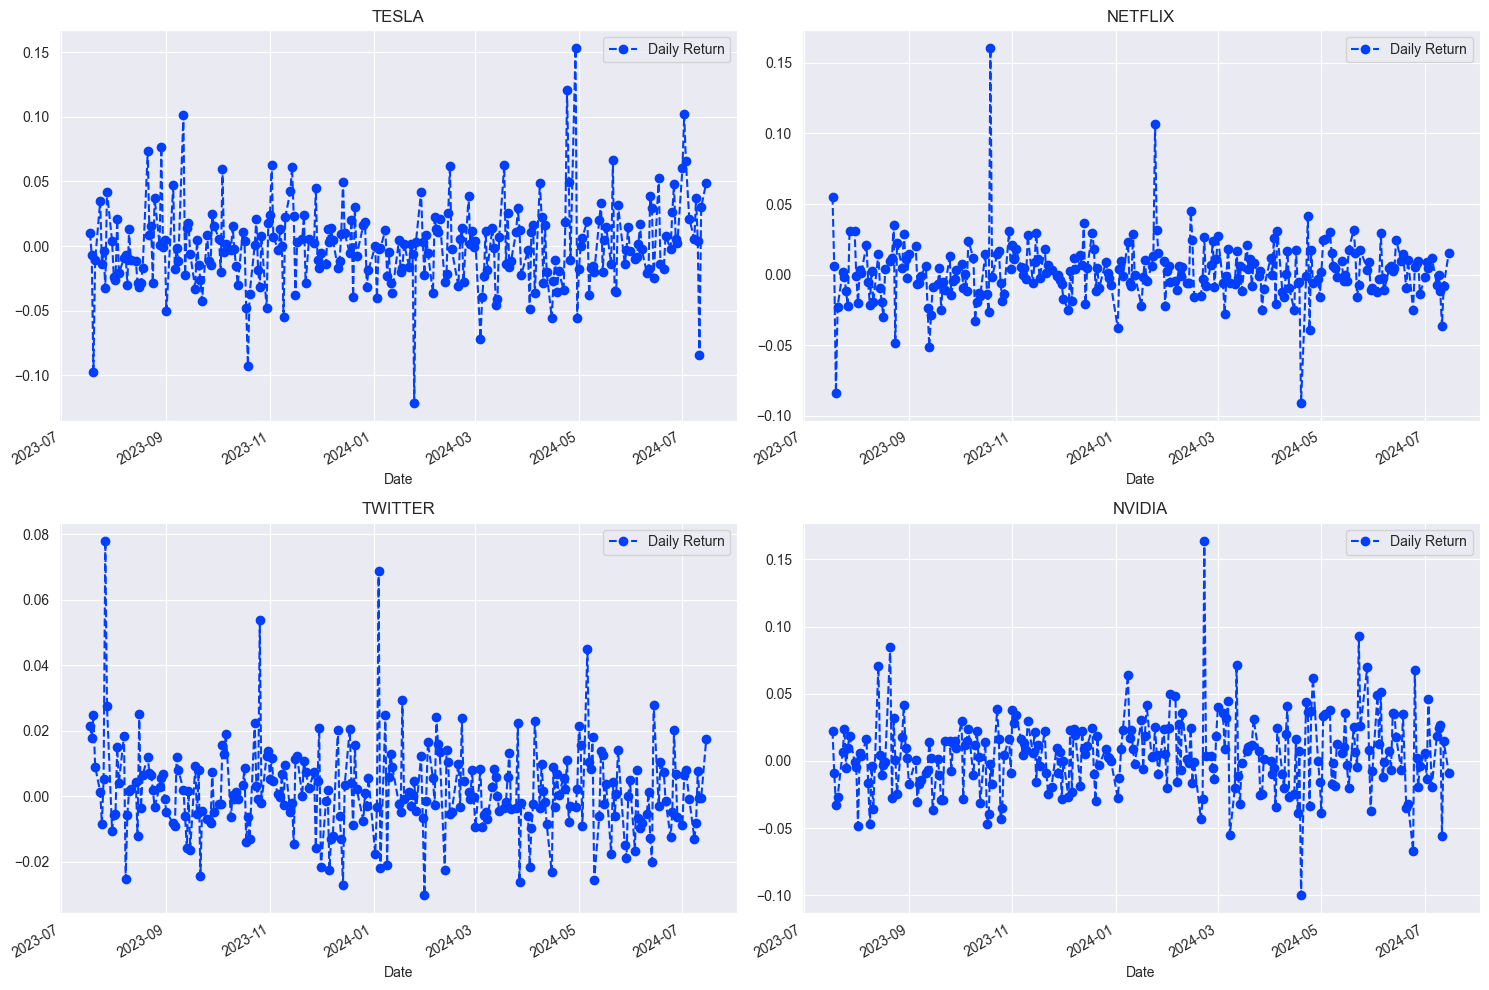

In [15]:
for stock in companies:
    stock_data[stock]['Daily Return'] = stock_data[stock]['Adj Close'].pct_change()

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

for ax, (stock, name) in zip(axes.flatten(), zip(companies, company_names)):
    stock_data[stock]['Daily Return'].plot(ax=ax, legend=True, linestyle='--', marker='o', linewidth=1.5)
    ax.set_title(name)

fig.tight_layout()
fig.show()

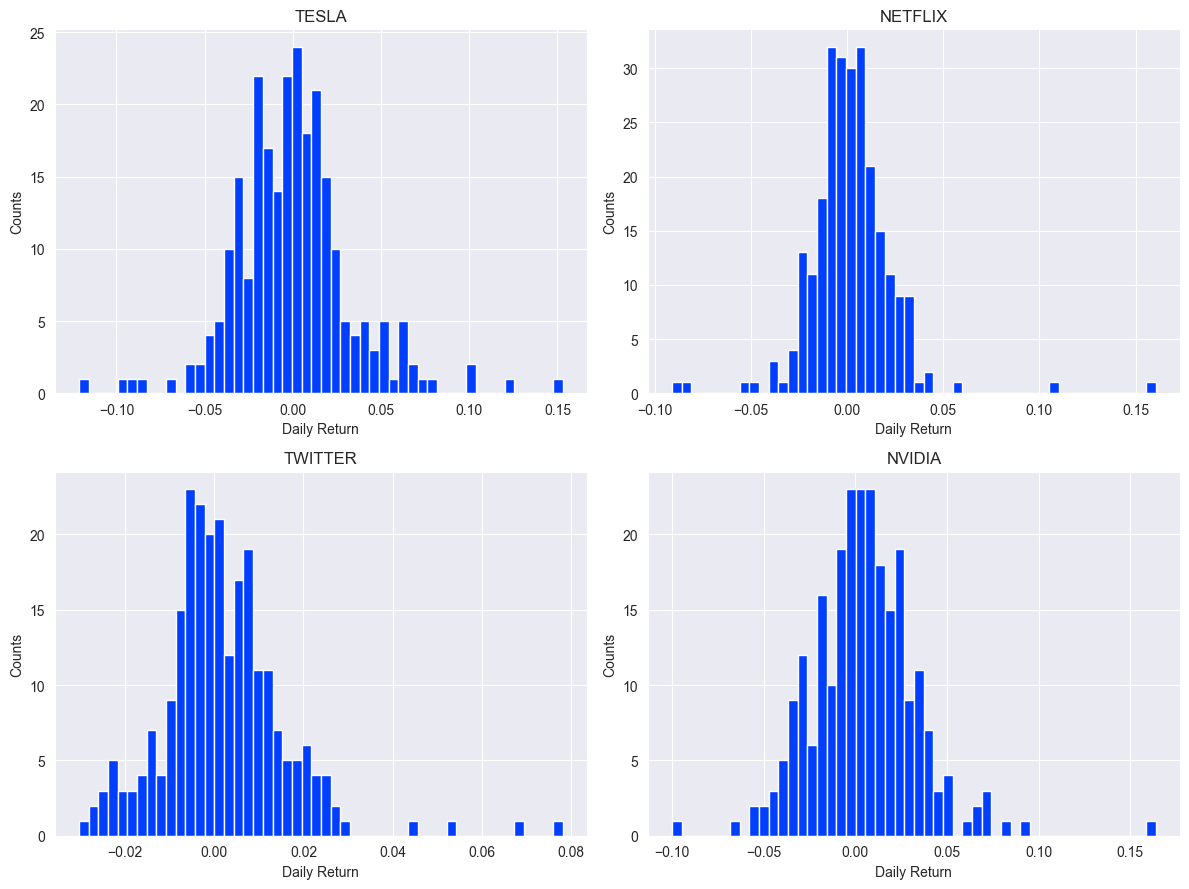

In [16]:
plt.figure(figsize=(12, 9))

for i, (stock, name) in enumerate(zip(companies, company_names), 1):
    plt.subplot(2, 2, i)
    stock_data[stock]['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(name)
    
plt.tight_layout()
plt.show()

Correlation Analysis

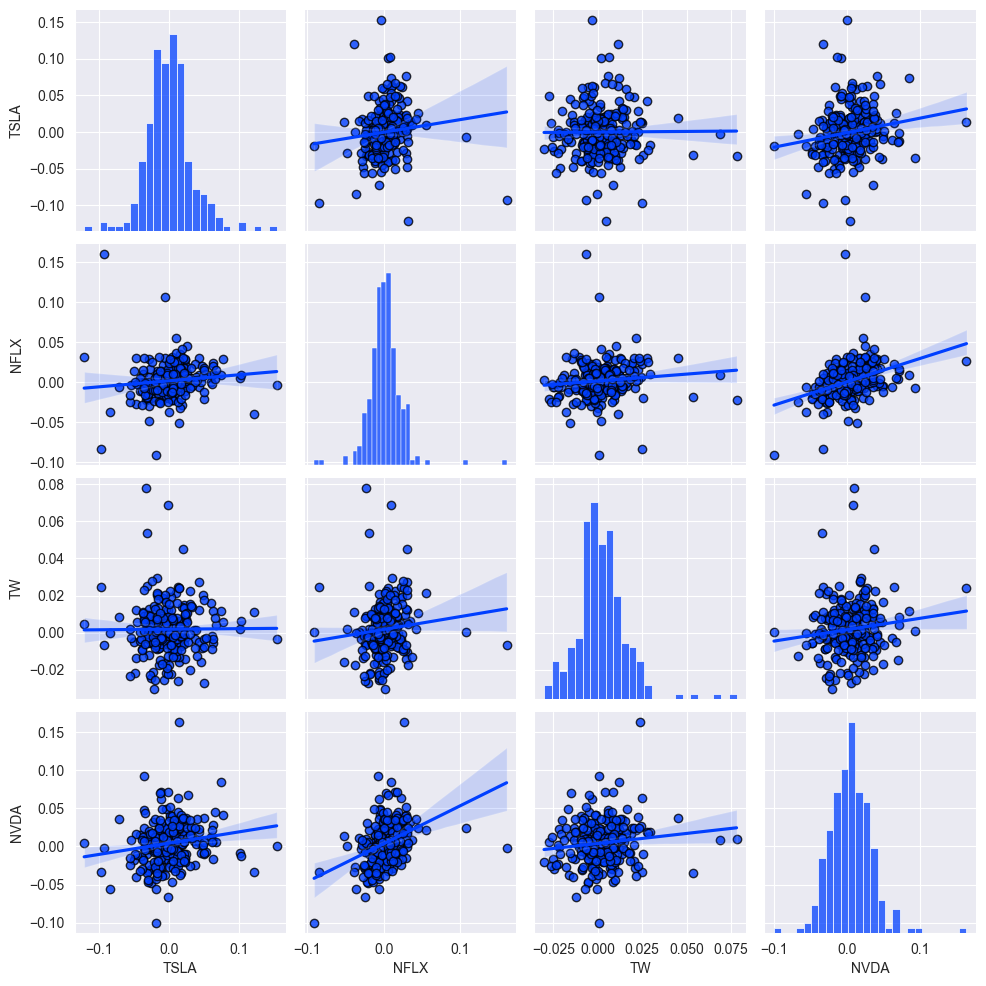

In [30]:
closing_prices = pd.DataFrame({stock: data['Adj Close'] for stock, data in stock_data.items()})
daily_returns = closing_prices.pct_change()

sns.pairplot(daily_returns.dropna(), kind='reg', plot_kws={'scatter_kws': {'edgecolor': 'black'}})

Pairplot of daily returns


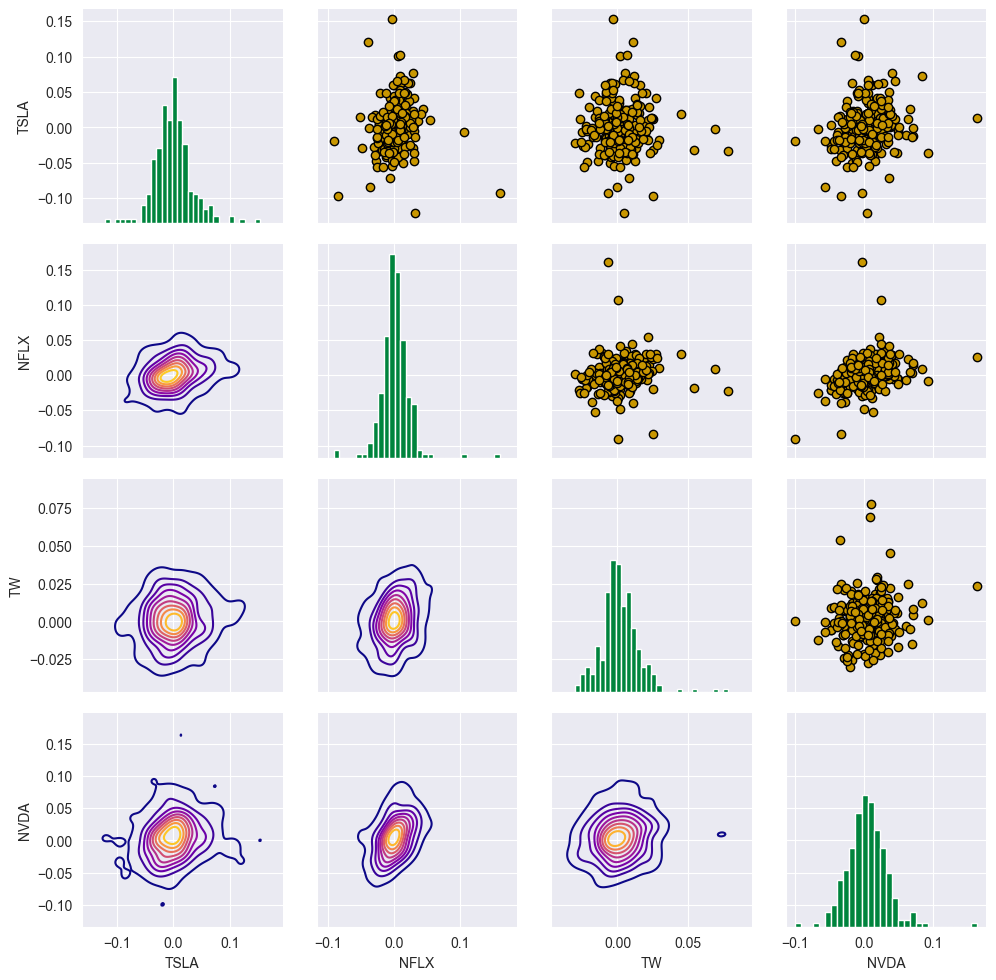

In [50]:
daily_returns = closing_prices.pct_change().dropna()

return_fig = sns.PairGrid(daily_returns.dropna())

return_fig.map_upper(plt.scatter, color='#C99700', edgecolor='black')
return_fig.map_lower(sns.kdeplot, cmap='plasma')
return_fig.map_diag(plt.hist, bins=30, color='#00843D')

plt.show()

## Risk Analysis

Plot expected return vs. risk

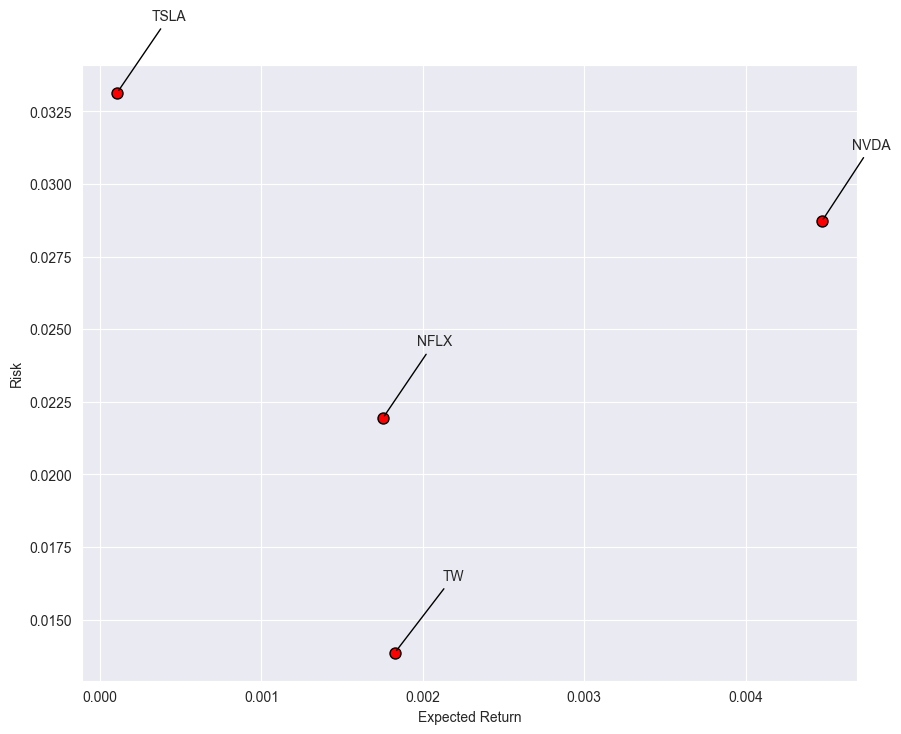

In [42]:
daily_returns = closing_prices.pct_change().dropna()

rets = daily_returns.dropna()
mean_returns = rets.mean()
std_dev = rets.std()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(mean_returns, std_dev, s=area, color='red', edgecolors='black')
plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label, x, y in zip(companies, mean_returns, std_dev):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', arrowprops=dict(arrowstyle='-', color='black'))

plt.show()


## Predicting Future Prices Using LSTM

#### Get the past stock quote

In [43]:
df = pdr.get_data_yahoo('TW', start='2010-01-01', end=datetime.now())

data = df.filter(['Close'])

dataset = data.values

training_data_len = int(np.ceil( len(dataset) * .95 ))

[*********************100%%**********************]  1 of 1 completed


#### Scale Data

In [44]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

#### Set up training and testing data

In [45]:
train_data = scaled_data[0:int(training_data_len), :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

#### Build the LSTM Model

In [46]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

c:\Users\PMYLS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


#### Train Model

In [47]:
model.fit(x_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - loss: 0.0097
Epoch 2/10
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - loss: 0.0011
Epoch 3/10
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - loss: 8.8601e-04
Epoch 4/10
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - loss: 7.1727e-04
Epoch 5/10
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - loss: 6.2421e-04
Epoch 6/10
1202/1202 ━━━━━━━━━━━━━━━━━━━━ -6s -5002us/step - loss: 5.0747e-04
Epoch 7/10
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - loss: 5.1637e-04
Epoch 8/10
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 16s 14ms/step - loss: 4.3174e-04
Epoch 9/10
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - loss: 5.2273e-04
Epoch 10/10
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - loss: 4.7815e-04


#### Test Model

In [48]:
test_data = scaled_data[training_data_len - 60:, :]
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

#### Predictions of Prices

In [49]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 169ms/step


#### Plot Data (Training and Predicted)

C:\Users\PMYLS\AppData\Local\Temp\ipykernel_11472\1393446210.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


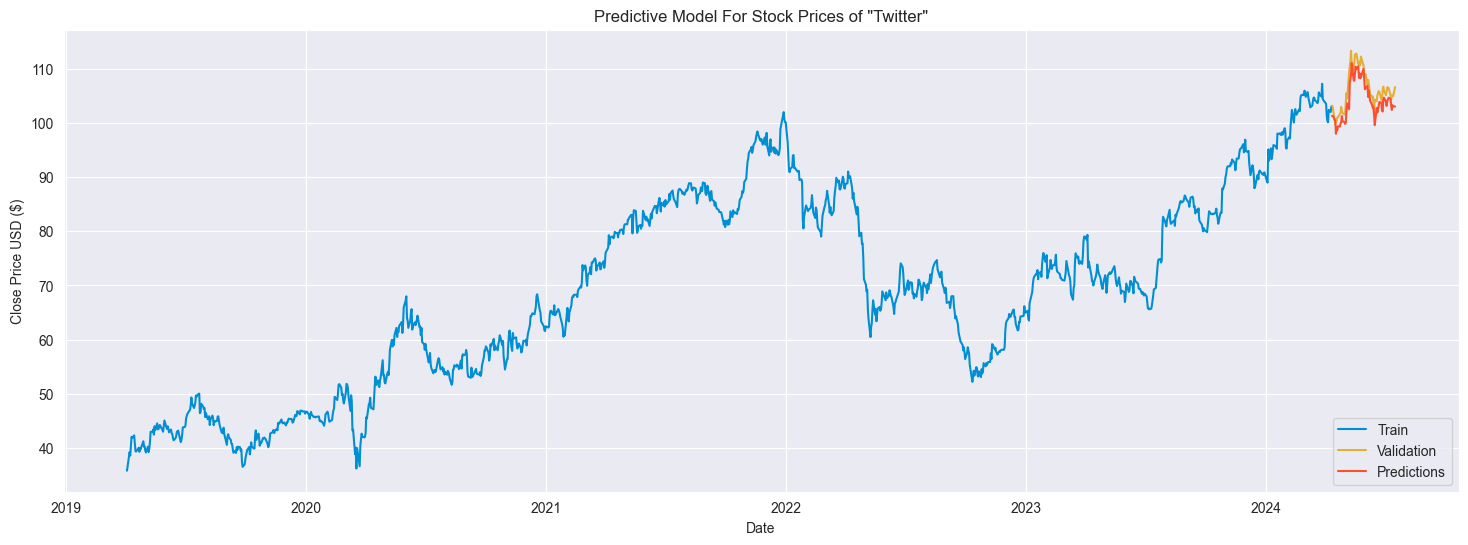

In [57]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(18,6))
plt.title('Predictive Model For Stock Prices of "Twitter"')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train['Close'], linewidth=1.5, color='#008fd5')  # Set color for train data
plt.plot(valid['Close'], linewidth=1.5, color='#e5ae38')  # Set color for validation data
plt.plot(valid['Predictions'], linewidth=1.5, color='#fc4f30')  # Set color for predictions
plt.legend(['Train', 'Validation', 'Predictions'], loc='lower right')
plt.show()